In [2]:
# Imports 
import random 
import names # https://pypi.org/project/names/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os

Creating the simulation dataset

In [3]:
df = pd.DataFrame() 

In [9]:
seed = 1
random.seed(seed)
np.random.seed(seed)

# Initialise empty lists
sampleid_list = []
fname_list = []
lname_list = []
age_list = []
gender_list = []
country_list = []
city_list = []
bmi_list = []
height_list = []
edu_list = []
gene_expr_list = []
snp_list = []
cc_status_list = []

# Declare values
education = ["primary", "high school", "bachelor", "master", "phD"]
genders = ["Male", "Female"]
snps = [0,1,2]
country_data = pd.read_csv(os.getcwd() + "/Data/country-list.csv", usecols = [0])['country'].to_list()
city_data = pd.read_csv(os.getcwd() + "/Data/country-list.csv", usecols = [1])['capital'].to_list()


# Assign random countries
#country_list = country_data.sample(n=500, replace = True).reset_index(drop=True)

# Loop from 0 to 499 and fill in the remaining columns
for i in range(0,500):
    # Assign sample id by increment
    sample = ("A001_0" + str(i))
    sampleid_list.append(sample)  
    
    # Assign random gender
    gender_list.append(genders[random.randint(0,1)])
    
    # Assign first name, weight, height, and BMI dependent on gender
    if gender_list[i] == "Male":
        rand_fname = names.get_first_name(gender='male')
        # Reference: https://asbmr.onlinelibrary.wiley.com/doi/full/10.1002/jbm4.10358
        bmi = np.random.normal(27.84, 4.25)
        height = np.random.normal(176, 6.8)
    else:
        rand_fname = names.get_first_name(gender='female')
        bmi = np.random.normal(27.09, 5.19)
        height = np.random.normal(162, 6.3)
    fname_list.append(rand_fname)
    bmi_list.append(np.round(bmi, 2))
    height_list.append(np.round(height, 2))
    
    # Assign case-control status
    cc_status = (0 if bmi < 30 else 1)
    cc_status_list.append(cc_status)

    # Assign random last name
    rand_lname = names.get_last_name()
    lname_list.append(rand_lname)

    # Assign random age
    rand_age = random.randint(20, 79)
    age_list.append(rand_age)
    
    # Assign random country
    country_list.append(country_data[random.randint(0, len(country_data)-1)])

    # Assign capital city
    city_list.append(city_data[random.randint(0, len(city_data)-1)])
    
    # Assign random educational attainment
    edu_list.append(education[random.randint(0, 4)])   

    # Assign random 10 gene expression values
    gene_list = [None] * 10
    for x in range(0,10):
        gene_mean = random.randint(2,8)  + (2 if case else 0)
        gene_std = random.randint(10,20)/10
        gene_expr = np.random.normal(gene_mean, gene_std)
        if gene_expr < 0: gene_expr=0
        gene_list[x] = gene_expr
    gene_expr_list.append(gene_list) 
    
    snps_ind = random.choices(snps,k=5)
    snp_list.append(snps_ind)

df = pd.DataFrame(
    {'Sample ID': sampleid_list,
     'First name': fname_list,
     'Last name': lname_list,
     'Gender': gender_list,
     'Age': age_list,
     'Country': country_list,
     'City': city_list,
     'Height': height_list,
     'BMI': bmi_list,
     'Education': edu_list,
     'Gene expression': gene_expr_list,
     'SNPs': snp_list,
     'CC Status': cc_status_list

    })

df.to_csv("simulated.csv")

<AxesSubplot:ylabel='Frequency'>

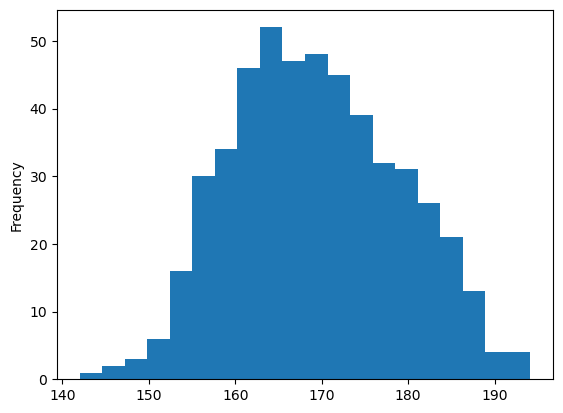

In [219]:
df['height'].plot.hist(bins=20)

In [202]:
country_data = pd.read_csv("/Users/tina/Desktop/simulation /country-capitals/data/country-list.csv")
country_data = country_data.drop(country_data.columns[2], axis =1)
sample = country_data.sample(n=500, replace = True)
sample = sample.reset_index(drop=True)

df = pd.concat([df,sample],axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tina/Desktop/simulation /country-capitals/data/country-list.csv'

In [203]:
edu_dict = {'education': ["primary", "high school", "bachelor", "master", "phD"]}
education_levels = pd.DataFrame(edu_dict)
education_sample = education_levels.sample(n=500, replace = True)
education_sample = education_sample.reset_index(drop=True)

df = pd.concat([df,education_sample],axis=1)

In [212]:
list_gene = ['gene_exp_val_1','gene_exp_val_2','gene_exp_val_3','gene_exp_val_4','gene_exp_val_5','gene_exp_val_6','gene_exp_val_7','gene_exp_val_8','gene_exp_val_9','gene_exp_val_10']
for index in range(0,10):
    gene_list = [None] * 500
    for i in range(0,500):
        gene_mean = random.randint(2,8)
        gene_std = random.randint(10,20)/10
        gene_expr = np.random.normal(gene_mean, gene_std)
        gene_list[i] = gene_expr
    df[list_gene[index]] = gene_list

In [213]:
list_SNP = [0,1,2]
SNP1 = random.choices(list_SNP,k=500)
SNP2 = random.choices(list_SNP,k=500)
SNP3 = random.choices(list_SNP,k=500)
SNP4 = random.choices(list_SNP,k=500)
SNP5 = random.choices(list_SNP,k=500)

# dict = {'SNP1': SNP1, 'SNP2': SNP2, 'SNP3': SNP3, 'SNP4':SNP4, 'SNP5':SNP5} 
df['SNP1'] = SNP1
df['SNP2'] = SNP2
df['SNP3'] = SNP3
df['SNP4'] = SNP4
df['SNP5'] = SNP5

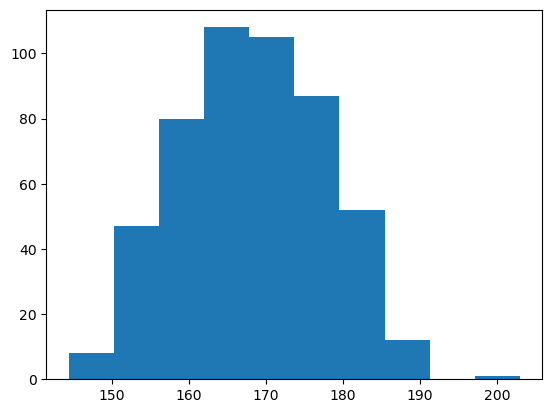

In [231]:
plt.hist(df['height'])
plt.show()

In [ ]:
# Summary statistics 